## setup

In [1]:
topology = 'A'
omission = 'omitFluxes'

In [100]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
np.random.seed(123)
import tellurium as te

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import antemll, util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
ant_noReg ='../models/Antimony/topologyA-noReg.ant' 
ant_reg1 ='../models/Antimony/topologyA-reg1.ant'
ant_reg2 ='../models/Antimony/topologyA-reg2.ant' 

rr_noReg = te.loada(ant_noReg)
rr_noReg.conservedMoietyAnalysis = True
rr_noReg.steadyState()

rr_reg1 = te.loada(ant_reg1)
rr_reg1.conservedMoietyAnalysis = True
rr_reg1.steadyState()

rr_reg2 = te.loada(ant_reg2)
rr_reg2.conservedMoietyAnalysis = True
rr_reg2.steadyState()

gt_noReg = rr_noReg.getScaledElasticityMatrix().ravel()
gt_reg1 = rr_reg1.getScaledElasticityMatrix().ravel()
gt_reg2 = rr_reg2.getScaledElasticityMatrix().ravel()

In [39]:
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

In [5]:
datafile01_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.1.csv'
datafile02_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.2.csv'
datafile03_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.3.csv'
datafile04_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.4.csv'
datafile05_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.5.csv'
datafile15_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_1.5.csv'
datafile3_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_3.csv'
datafile5_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_5.csv'
datafile7_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_7.csv'
datafile100_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_10.csv'

datafile01_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.1.csv'
datafile02_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.2.csv'
datafile03_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.3.csv'
datafile04_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.4.csv'
datafile05_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.5.csv'
datafile15_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_1.5.csv'
datafile3_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_3.csv'
datafile5_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_5.csv'
datafile7_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_7.csv'
datafile100_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_10.csv'

datafile01_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.1.csv'
datafile02_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.2.csv'
datafile03_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.3.csv'
datafile04_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.4.csv'
datafile05_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.5.csv'
datafile15_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_1.5.csv'
datafile3_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_3.csv'
datafile5_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_5.csv'
datafile7_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_7.csv'
datafile100_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_10.csv'


In [6]:
BMCA_obj01_noReg = antemll.antemll(ant_noReg, datafile01_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_noReg = antemll.antemll(ant_noReg, datafile02_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_noReg = antemll.antemll(ant_noReg, datafile03_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_noReg = antemll.antemll(ant_noReg, datafile04_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_noReg = antemll.antemll(ant_noReg, datafile05_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_noReg = antemll.antemll(ant_noReg, datafile15_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_noReg = antemll.antemll(ant_noReg, datafile3_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_noReg = antemll.antemll(ant_noReg, datafile5_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_noReg = antemll.antemll(ant_noReg, datafile7_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_noReg = antemll.antemll(ant_noReg, datafile100_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg1 = antemll.antemll(ant_reg1, datafile01_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg1 = antemll.antemll(ant_reg1, datafile02_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg1 = antemll.antemll(ant_reg1, datafile03_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg1 = antemll.antemll(ant_reg1, datafile04_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg1 = antemll.antemll(ant_reg1, datafile05_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg1 = antemll.antemll(ant_reg1, datafile15_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg1 = antemll.antemll(ant_reg1, datafile3_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg1 = antemll.antemll(ant_reg1, datafile5_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg1 = antemll.antemll(ant_reg1, datafile7_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg1 = antemll.antemll(ant_reg1, datafile100_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg2 = antemll.antemll(ant_reg2, datafile01_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg2 = antemll.antemll(ant_reg2, datafile02_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg2 = antemll.antemll(ant_reg2, datafile03_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg2 = antemll.antemll(ant_reg2, datafile04_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg2 = antemll.antemll(ant_reg2, datafile05_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg2 = antemll.antemll(ant_reg2, datafile15_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg2 = antemll.antemll(ant_reg2, datafile3_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg2 = antemll.antemll(ant_reg2, datafile5_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg2 = antemll.antemll(ant_reg2, datafile7_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg2 = antemll.antemll(ant_reg2, datafile100_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyA_cobra.ant


## downloading all the trace files


In [7]:
picklefolder = '../data/results/tracePickles/'
oldpicklefolder = '../data/results/tracePickles-20240801/'

In [8]:
with gzip.open(oldpicklefolder + f'topologyA-noReg_{omission}_traces.pgz', "rb") as f:
    traces_noReg = cloudpickle.load(f, encoding='bytes')

with gzip.open(oldpicklefolder + f'topologyA-reg1_{omission}_traces.pgz', "rb") as f:
    traces_reg1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(oldpicklefolder + f'topologyA-reg2_{omission}_traces.pgz', "rb") as f:
    traces_reg2 = cloudpickle.load(f, encoding='bytes')

In [9]:
trace01_noReg=traces_noReg['trace01']
trace02_noReg=traces_noReg['trace02']
trace03_noReg=traces_noReg['trace03']
trace04_noReg=traces_noReg['trace04']
trace05_noReg=traces_noReg['trace05']
trace15_noReg=traces_noReg['trace15']
trace3_noReg=traces_noReg['trace3']
trace5_noReg=traces_noReg['trace5']
trace7_noReg=traces_noReg['trace7']
trace10_noReg=traces_noReg['trace100']

trace01_reg1=traces_reg1['trace01']
trace02_reg1=traces_reg1['trace02']
trace03_reg1=traces_reg1['trace03']
trace04_reg1=traces_reg1['trace04']
trace05_reg1=traces_reg1['trace05']
trace15_reg1=traces_reg1['trace15']
trace3_reg1=traces_reg1['trace3']
trace5_reg1=traces_reg1['trace5']
trace7_reg1=traces_reg1['trace7']
trace10_reg1=traces_reg1['trace100']

trace01_reg2=traces_reg2['trace01']
trace02_reg2=traces_reg2['trace02']
trace03_reg2=traces_reg2['trace03']
trace04_reg2=traces_reg2['trace04']
trace05_reg2=traces_reg2['trace05']
trace15_reg2=traces_reg2['trace15']
trace3_reg2=traces_reg2['trace3']
trace5_reg2=traces_reg2['trace5']
trace7_reg2=traces_reg2['trace7']
trace10_reg2=traces_reg2['trace100']

## establishing elasticity means

In [10]:
if omission == 'allData':
    # for all data
    Ex01_noReg = util.get_az_summary(trace01_noReg)
    Ex01_reg1 = util.get_az_summary(trace01_reg1)
    Ex01_reg2 = util.get_az_summary(trace01_reg2)

    Ex02_noReg = util.get_az_summary(trace02_noReg)
    Ex02_reg1 = util.get_az_summary(trace02_reg1)
    Ex02_reg2 = util.get_az_summary(trace02_reg2)

    Ex03_noReg = util.get_az_summary(trace03_noReg)
    Ex03_reg1 = util.get_az_summary(trace03_reg1)
    Ex03_reg2 = util.get_az_summary(trace03_reg2)

    Ex04_noReg = util.get_az_summary(trace04_noReg)
    Ex04_reg1 = util.get_az_summary(trace04_reg1)
    Ex04_reg2 = util.get_az_summary(trace04_reg2)

    Ex05_noReg = util.get_az_summary(trace05_noReg)
    Ex05_reg1 = util.get_az_summary(trace05_reg1)
    Ex05_reg2 = util.get_az_summary(trace05_reg2)

    Ex15_noReg = util.get_az_summary(trace15_noReg)
    Ex15_reg1 = util.get_az_summary(trace15_reg1)
    Ex15_reg2 = util.get_az_summary(trace15_reg2)

    Ex3_noReg = util.get_az_summary(trace3_noReg)
    Ex3_reg1 = util.get_az_summary(trace3_reg1)
    Ex3_reg2 = util.get_az_summary(trace3_reg2)

    Ex5_noReg = util.get_az_summary(trace5_noReg)
    Ex5_reg1 = util.get_az_summary(trace5_reg1)
    Ex5_reg2 = util.get_az_summary(trace5_reg2)

    Ex7_noReg = util.get_az_summary(trace7_noReg)
    Ex7_reg1 = util.get_az_summary(trace7_reg1)
    Ex7_reg2 = util.get_az_summary(trace7_reg2)

    Ex100_noReg = util.get_az_summary(trace10_noReg)
    Ex100_reg1 = util.get_az_summary(trace10_reg1)
    Ex100_reg2 = util.get_az_summary(trace10_reg2)

else:
    # for omitted data
    Ex01_noReg = util.get_az_mean(trace01_noReg)
    Ex01_reg1 = util.get_az_mean(trace01_reg1)
    Ex01_reg2 = util.get_az_mean(trace01_reg2)

    Ex02_noReg = util.get_az_mean(trace02_noReg)
    Ex02_reg1 = util.get_az_mean(trace02_reg1)
    Ex02_reg2 = util.get_az_mean(trace02_reg2)

    Ex03_noReg = util.get_az_mean(trace03_noReg)
    Ex03_reg1 = util.get_az_mean(trace03_reg1)
    Ex03_reg2 = util.get_az_mean(trace03_reg2)

    Ex04_noReg = util.get_az_mean(trace04_noReg)
    Ex04_reg1 = util.get_az_mean(trace04_reg1)
    Ex04_reg2 = util.get_az_mean(trace04_reg2)

    Ex05_noReg = util.get_az_mean(trace05_noReg)
    Ex05_reg1 = util.get_az_mean(trace05_reg1)
    Ex05_reg2 = util.get_az_mean(trace05_reg2)

    Ex15_noReg = util.get_az_mean(trace15_noReg)
    Ex15_reg1 = util.get_az_mean(trace15_reg1)
    Ex15_reg2 = util.get_az_mean(trace15_reg2)

    Ex3_noReg = util.get_az_mean(trace3_noReg)
    Ex3_reg1 = util.get_az_mean(trace3_reg1)
    Ex3_reg2 = util.get_az_mean(trace3_reg2)

    Ex5_noReg = util.get_az_mean(trace5_noReg)
    Ex5_reg1 = util.get_az_mean(trace5_reg1)
    Ex5_reg2 = util.get_az_mean(trace5_reg2)

    Ex7_noReg = util.get_az_mean(trace7_noReg)
    Ex7_reg1 = util.get_az_mean(trace7_reg1)
    Ex7_reg2 = util.get_az_mean(trace7_reg2)

    Ex100_noReg = util.get_az_mean(trace10_noReg)
    Ex100_reg1 = util.get_az_mean(trace10_reg1)
    Ex100_reg2 = util.get_az_mean(trace10_reg2)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [ ]:
# free #free

## How does presence of regulators or perturbation strength affect the BMCA outcomes?

In [95]:
# Create dataset
perturbation = list(np.repeat(pt_labels, 176).flatten())*3  # 10 subjects, 5 responses each
regulation = np.array(['noReg']*1760 + ['reg1']*1760 + ['reg2']*1760)
elasticity_number = np.tile(range(176), 10*3)  # 5 questions each for 10 subjects
# responses should be size (10, 176)
elasticity_value = np.vstack([ela_noReg_values.T, ela_reg1_values.T, ela_reg2_values.T])

# Convert to long format
df = pd.DataFrame({
    'PtLvl': perturbation,
    'Regulation': regulation,
    'ElaNo': elasticity_number,
    'ElaVal': elasticity_value.flatten()
})
# View a snippet of the data
df.head(10)


,PtLvl,Regulation,ElaNo,ElaVal
0,0.1x,noReg,0,-1.096000
1,0.1x,noReg,1,-0.000667
2,0.1x,noReg,2,-0.000667
3,0.1x,noReg,3,0.002333
4,0.1x,noReg,4,0.004667
5,0.1x,noReg,5,1.779333
6,0.1x,noReg,6,-0.001667
7,0.1x,noReg,7,-0.004000
8,0.1x,noReg,8,0.007667
9,0.1x,noReg,9,0.003333


In [123]:
# Pivot data to wide format for MANOVA
df_wide = df.pivot_table(index=['PtLvl','Regulation'], columns='ElaNo', values=['ElaVal'], sort=False)
df_wide.columns = [f'E{i}' for i in range(176)]  # Rename columns
df_wide.reset_index(inplace=True)

print(df_wide.shape)
df_wide.head()

(30, 178)


,PtLvl,Regulation,E0,E1,E2,E3,E4,E5,E6,E7,...,E166,E167,E168,E169,E170,E171,E172,E173,E174,E175
0,0.1x,noReg,-1.096000,-0.000667,-0.000667,0.002333,0.004667,1.779333,-0.001667,-0.004000,...,1.108667,-0.002000,-0.005667,0.007667,-0.001667,0.006000,0.004000,-0.001667,-0.008000,-0.002000
1,0.1x,reg1,-0.906667,-0.000667,-0.001000,0.002000,0.004667,0.928667,-0.002333,-0.003667,...,1.475667,-0.003000,-0.006000,0.007667,-0.001667,0.006667,0.004333,-0.002667,-0.008000,-0.002667
2,0.1x,reg2,-1.459000,-0.005667,0.010333,0.000000,0.004667,0.777000,0.002000,0.002000,...,0.903000,0.000667,-0.003667,0.003667,0.002000,-0.004667,0.004333,-0.005000,0.002000,-0.000667
3,0.2x,noReg,-1.011667,0.001667,0.001667,-0.000667,0.005000,0.741667,0.002667,-0.009667,...,0.796000,0.003667,0.008000,-0.003333,0.000667,-0.007667,-0.001000,0.001333,-0.003667,0.007667
4,0.2x,reg1,-0.804333,0.001667,0.001333,-0.000667,0.005000,0.774333,0.003000,-0.010333,...,0.777000,0.004000,0.007333,-0.002333,0.001667,-0.008000,-0.000667,0.002333,-0.003333,0.006667


### Perform MANOVA

In [ ]:
# No issues with MANOVA after only including 25 elasticities
# as dependent variables

manova_treatment = MANOVA.from_formula('E0+E1+E2+E3+E4+E5+E6+E7+E8+E9+E10+E11+E12+E13+E14+E15+E16+E17+E18+E19+E20+E21+E22+E23+E24+E25 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

### Preventing MANOVA issues

In [ ]:
# check if there are any highly correlated dependent variables
# multicollinearity can cause MANOVA issues
np.where((df_wide.corr().values > 0.9) & (df_wide.corr().values < 1))

In [124]:
# check for lack of variability in the dependent variables
# having too little variability can cause MANOVA issues

# Calculate standard deviation for each column
std_devs = df_wide.std()

# Identify columns with zero standard deviation
no_variability_cols = std_devs[std_devs < 0.005].index.tolist()

C:\Users\user\AppData\Local\Temp\ipykernel_21476\2939026527.py:5: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [125]:
print("Variables without variability:", no_variability_cols)
print(len(no_variability_cols))

Variables without variability: ['E1', 'E2', 'E3', 'E4', 'E6', 'E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14', 'E15', 'E16', 'E18', 'E19', 'E20', 'E23', 'E24', 'E25', 'E27', 'E28', 'E30', 'E32', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E52', 'E55', 'E57', 'E58', 'E59', 'E60', 'E61', 'E63', 'E65', 'E66', 'E70', 'E71', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E82', 'E83', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E99', 'E100', 'E101', 'E102', 'E104', 'E105', 'E107', 'E108', 'E110', 'E111', 'E112', 'E113', 'E115', 'E116', 'E117', 'E119', 'E120', 'E121', 'E122', 'E124', 'E125', 'E126', 'E127', 'E128', 'E130', 'E131', 'E132', 'E133', 'E135', 'E136', 'E137', 'E138', 'E139', 'E140', 'E141', 'E142', 'E143', 'E144', 'E145', 'E146', 'E147', 'E149', 'E150', 'E151', 'E152', 'E153', 'E154', 'E155', 'E157', 'E158', 'E160', 'E161', 'E162', 'E164', 'E165', 'E167', 'E168', 'E169', 'E170', 'E171', 'E172',

In [122]:
# Drop columns with no variability
df_wide_cleaned = df_wide.drop(columns=no_variability_cols)
df_wide_cleaned.shape


(30, 44)

### Rerunning MANOVA with cleaned df

In [131]:
# Perform MANOVA with a treatment effect
manova_treatment = MANOVA.from_formula('E0+ E5+ E11+ E17+ E21+ E22+ E26+ E29+ E31+ E33+ E34+ E35+ E50+ E51+ E53+ E54+ E56+ E62+ E64+ E67+ E68+ E69+ E72+ E73+ E80+ E81+ E84+ E91+ E98+ E103+ E106+ E109+ E114+ E118+ E123+ E129+ E134+ E148+ E156+ E159+ E163+ E166 ~ Regulation', data=df_wide_cleaned)
print(manova_treatment.mv_test())

                                Multivariate linear model
                                                                                         
-------------------------------------------------------------------------------------------
             Intercept                  Value            Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------------------------------
                Wilks' lambda                  0.0000   28.0000   0.0000    0.0000      nan
               Pillai's trace                  3.1664   28.0000   0.0000   -0.0000      nan
       Hotelling-Lawley trace   1501199875790164.0000   28.0000   0.0000    0.0000      nan
          Roy's greatest root   1501199875790164.2500   28.0000   0.0000    0.0000      nan
-----------------------------------------------------------------------------------------
                                                                                         
----------------------------

c:\Users\user\miniconda3\envs\gayles\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:196: RuntimeWarning:

invalid value encountered in power



### Rerunning MANOVA in batches

I am rerunning the repeated measures MANOVA in multiple batches because it cannot handle running all the dependent variables at once. 


In [142]:
# 0-24
manova_treatment = MANOVA.from_formula('E0+E1+E2+E3+E4+E5+E6+E7+E8+E9+E10+E11+E12+E13+E14+E15+E16+E17+E18+E19+E20+E21+E22+E23+E24 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value    Num DF Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0021 25.0000 3.0000 58.1494 0.0032
         Pillai's trace   0.9979 25.0000 3.0000 58.1494 0.0032
 Hotelling-Lawley trace 484.5783 25.0000 3.0000 58.1494 0.0032
    Roy's greatest root 484.5783 25.0000 3.0000 58.1494 0.0032
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       Regulation        Value    Num DF Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0024 50.0000 6.0000  2.3396 0.1428
         Pillai's trace   1.3790 50.0000 8.0000  0.3553 0.9883
 Hotelling-

In [141]:
# 25-49
manova_treatment = MANOVA.from_formula('E25+E26+E27+E28+E29+E30+E31+E32+E33+E34+E35+E36+E37+E38+E39+E40+E41+E42+E43+E44+E45+E46+E47+E48+E49 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value    Num DF Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0028 25.0000 3.0000 42.4781 0.0050
         Pillai's trace   0.9972 25.0000 3.0000 42.4781 0.0050
 Hotelling-Lawley trace 353.9845 25.0000 3.0000 42.4781 0.0050
    Roy's greatest root 353.9845 25.0000 3.0000 42.4781 0.0050
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       Regulation        Value    Num DF Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0013 50.0000 6.0000  3.2698 0.0690
         Pillai's trace   1.7381 50.0000 8.0000  1.0620 0.5086
 Hotelling-

In [140]:
# 50-74
manova_treatment = MANOVA.from_formula('E50+E51+E52+E53+E54+E55+E56+E57+E58+E59+E60+E61+E62+E63+E64+E65+E66+E67+E68+E69+E70+E71+E72+E73+E74 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0003 25.0000 3.0000 460.0688 0.0001
         Pillai's trace    0.9997 25.0000 3.0000 460.0688 0.0001
 Hotelling-Lawley trace 3833.9069 25.0000 3.0000 460.0688 0.0001
    Roy's greatest root 3833.9069 25.0000 3.0000 460.0688 0.0001
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Regulation        Value    Num DF Den DF F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0005 50.0000 6.0000  5.3317 0.0210
           Pillai's trace   1.8497 50.0000 8.

In [139]:
# 75-99
manova_treatment = MANOVA.from_formula('E75+E76+E77+E78+E79+E80+E81+E82+E83+E84+E85+E86+E87+E88+E89+E90+E91+E92+E93+E94+E95+E96+E97+E98+E99 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0008 25.0000 3.0000 148.0491 0.0008
         Pillai's trace    0.9992 25.0000 3.0000 148.0491 0.0008
 Hotelling-Lawley trace 1233.7426 25.0000 3.0000 148.0491 0.0008
    Roy's greatest root 1233.7426 25.0000 3.0000 148.0491 0.0008
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Regulation        Value    Num DF Den DF F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0009 50.0000 6.0000  3.9354 0.0447
           Pillai's trace   1.7556 50.0000 8.

In [138]:
# 100-124
manova_treatment = MANOVA.from_formula('E100+E101+E102+E103+E104+E105+E106+E107+E108+E109+E110+E111+E112+E113+E114+E115+E116+E117+E118+E119+E120+E121+E122+E123+E124 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0008 25.0000 3.0000 145.8234 0.0008
         Pillai's trace    0.9992 25.0000 3.0000 145.8234 0.0008
 Hotelling-Lawley trace 1215.1948 25.0000 3.0000 145.8234 0.0008
    Roy's greatest root 1215.1948 25.0000 3.0000 145.8234 0.0008
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Regulation        Value    Num DF Den DF F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0013 50.0000 6.0000  3.1566 0.0748
           Pillai's trace   1.6213 50.0000 8.

In [137]:
# 125-149
manova_treatment = MANOVA.from_formula('E125+E126+E127+E128+E129+E130+E131+E132+E133+E134+E135+E136+E137+E138+E139+E140+E141+E142+E143+E144+E145+E146+E147+E148+E149 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0006 25.0000 3.0000 185.5755 0.0006
         Pillai's trace    0.9994 25.0000 3.0000 185.5755 0.0006
 Hotelling-Lawley trace 1546.4628 25.0000 3.0000 185.5755 0.0006
    Roy's greatest root 1546.4628 25.0000 3.0000 185.5755 0.0006
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Regulation        Value    Num DF Den DF F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0017 50.0000 6.0000  2.7924 0.0982
           Pillai's trace   1.4357 50.0000 8.

In [136]:
# 150-175
manova_treatment = MANOVA.from_formula('E150+E151+E152+E153+E154+E155+E156+E157+E158+E159+E160+E161+E162+E163+E164+E165+E166+E167+E168+E169+E170+E171+E172+E173+E174+E175 ~ Regulation', data=df_wide)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0002 26.0000 2.0000 333.6258 0.0030
         Pillai's trace    0.9998 26.0000 2.0000 333.6258 0.0030
 Hotelling-Lawley trace 4337.1351 26.0000 1.0000 166.8129 0.0611
    Roy's greatest root 4337.1351 26.0000 2.0000 333.6258 0.0030
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Regulation        Value    Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
           Wilks' lambda   0.0007 52.0000 4.0000   2.9110 0.1527
          Pillai's trace   1.4162 52.0000 6.0

clearly that didn't work, so perhaps we could just compare the effect of regulators within one perturbation? 

### Rerunning repeated measures MANOVA in batches for high variance elasticities only

In [198]:
import random

elaList = [i for i in list(df_wide_cleaned.columns) if 'E' in i]
random.shuffle(elaList)  # Shuffle the list to ensure randomness
split_point = len(elaList) // 2

In [200]:
manova_treatment = MANOVA.from_formula("+".join(elaList[:split_point])+' ~ Regulation', data=df_wide_cleaned)
print(manova_treatment.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value    Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda   0.0018 21.0000 7.0000 180.4369 0.0000
         Pillai's trace   0.9982 21.0000 7.0000 180.4369 0.0000
 Hotelling-Lawley trace 541.3106 21.0000 7.0000 180.4369 0.0000
    Roy's greatest root 541.3106 21.0000 7.0000 180.4369 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Regulation        Value   Num DF  Den DF F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda  0.0203 42.0000 14.0000  2.0038 0.0796
          Pillai's trace  1.6832 42.0000 16.0000  2.0238 0.

In [201]:
manova_treatment = MANOVA.from_formula("+".join(elaList[split_point:])+' ~ Regulation', data=df_wide_cleaned)
print(manova_treatment.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value    Num DF Den DF F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0066 21.0000 7.0000 50.5191 0.0000
         Pillai's trace   0.9934 21.0000 7.0000 50.5191 0.0000
 Hotelling-Lawley trace 151.5573 21.0000 7.0000 50.5191 0.0000
    Roy's greatest root 151.5573 21.0000 7.0000 50.5191 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        Regulation       Value   Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.0867 42.0000 14.0000  0.7988 0.7231
          Pillai's trace 1.3837 42.0000 16.0000  0.8553 0.6698
  Hotelling

## organizing elasticity values into pd dfs 

In [11]:
ela_noReg_values = np.column_stack([Ex01_noReg, Ex02_noReg, Ex03_noReg, 
                                Ex04_noReg, Ex05_noReg,  
                                Ex15_noReg, Ex3_noReg, Ex5_noReg, 
                                Ex7_noReg, Ex100_noReg])

ela_reg1_values = np.column_stack([Ex01_reg1, Ex02_reg1, Ex03_reg1, 
                                Ex04_reg1, Ex05_reg1,  
                                Ex15_reg1, Ex3_reg1, Ex5_reg1, 
                                Ex7_reg1, Ex100_reg1])

ela_reg2_values = np.column_stack([Ex01_reg2, Ex02_reg2, Ex03_reg2, 
                                Ex04_reg2, Ex05_reg2,  
                                Ex15_reg2, Ex3_reg2, Ex5_reg2, 
                                Ex7_reg2, Ex100_reg2])

ela_noReg_df = pd.DataFrame(ela_noReg_values, columns=pt_labels)
ela_reg1_df = pd.DataFrame(ela_reg1_values, columns=pt_labels)
ela_reg2_df = pd.DataFrame(ela_reg2_values, columns=pt_labels)

ela_noReg_df['median'] = ela_noReg_df.median(axis=1)
ela_noReg_df['min'] = ela_noReg_df.min(axis=1)
ela_noReg_df['max'] = ela_noReg_df.max(axis=1)

ela_reg1_df['median'] = ela_reg1_df.median(axis=1)
ela_reg1_df['min'] = ela_reg1_df.min(axis=1)
ela_reg1_df['max'] = ela_reg1_df.max(axis=1)

ela_reg2_df['median'] = ela_reg2_df.median(axis=1)
ela_reg2_df['min'] = ela_reg2_df.min(axis=1)
ela_reg2_df['max'] = ela_reg2_df.max(axis=1)

## graphing the elasticity predictions over perturbation level and regulator level

In [12]:
lower_y_noReg = np.array(ela_noReg_df['median']) - ela_noReg_df['min'].values
upper_y_noReg =np.array(ela_noReg_df['max'].values) - np.array(ela_noReg_df['median'])
errors_noReg = [lower_y_noReg, upper_y_noReg]

lower_y_reg1 = np.array(ela_reg1_df['median']) - ela_reg1_df['min'].values
upper_y_reg1 =np.array(ela_reg1_df['max'].values) - np.array(ela_reg1_df['median'])
errors_reg1 = [lower_y_reg1, upper_y_reg1]

lower_y_reg2 = np.array(ela_reg2_df['median']) - ela_reg2_df['min'].values
upper_y_reg2 =np.array(ela_reg2_df['max'].values) - np.array(ela_reg2_df['median'])
errors_reg2 = [lower_y_reg2, upper_y_reg2]


In [13]:
# MAE
print(round(sum(abs(ela_noReg_df['median']-gt_noReg))/len(gt_noReg),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg1))/len(gt_reg1),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg2))/len(gt_reg2),5))

0.01716
0.03682
0.04537


Text(0, 0.5, 'predicted elasticity values')

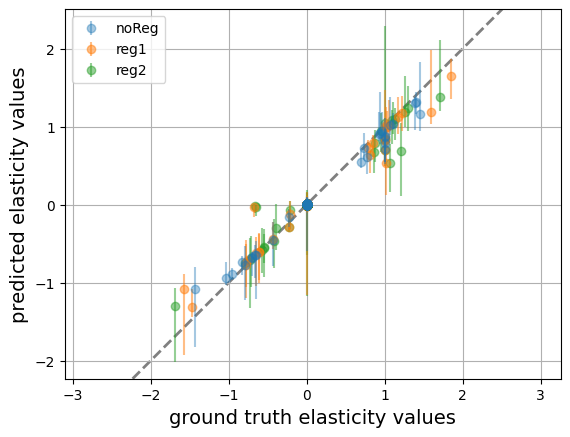

In [14]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gt_noReg, ela_noReg_df['median'], yerr=errors_noReg, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_reg1, ela_reg1_df['median'], yerr=errors_reg1, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_reg2, ela_reg2_df['median'], yerr=errors_reg2, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities.svg', format="svg")

## Calculating control coefficients

In [13]:
Ex01_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_noReg)['prior']['Ex'])
Ex02_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_noReg)['prior']['Ex'])
Ex03_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_noReg)['prior']['Ex'])
Ex04_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_noReg)['prior']['Ex'])
Ex05_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_noReg)['prior']['Ex'])
Ex15_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_noReg)['prior']['Ex'])
Ex3_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_noReg)['prior']['Ex'])
Ex5_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_noReg)['prior']['Ex'])
Ex7_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_noReg)['prior']['Ex'])
Ex100_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_noReg)['prior']['Ex'])

Ex01_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg1)['prior']['Ex'])
Ex02_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg1)['prior']['Ex'])
Ex03_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg1)['prior']['Ex'])
Ex04_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg1)['prior']['Ex'])
Ex05_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg1)['prior']['Ex'])
Ex15_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg1)['prior']['Ex'])
Ex3_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg1)['prior']['Ex'])
Ex5_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg1)['prior']['Ex'])
Ex7_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg1)['prior']['Ex'])
Ex100_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg1)['prior']['Ex'])

Ex01_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg2)['prior']['Ex'])
Ex02_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg2)['prior']['Ex'])
Ex03_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg2)['prior']['Ex'])
Ex04_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg2)['prior']['Ex'])
Ex05_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg2)['prior']['Ex'])
Ex15_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg2)['prior']['Ex'])
Ex3_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg2)['prior']['Ex'])
Ex5_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg2)['prior']['Ex'])
Ex7_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg2)['prior']['Ex'])
Ex100_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg2)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

## Calculating CCC values and making graphs

In [15]:
gtCCC_noReg = pd.DataFrame(rr_noReg.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())
gtCCC_reg1 = pd.DataFrame(rr_reg1.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())
gtCCC_reg2 = pd.DataFrame(rr_reg2.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())

### priors

In [16]:
priorCCC01_noReg = util.estimate_CCCs(BMCA_obj01_noReg, Ex01_prior_noReg.reshape((16,-1)))
priorCCC02_noReg = util.estimate_CCCs(BMCA_obj02_noReg, Ex02_prior_noReg.reshape((16,-1)))
priorCCC03_noReg = util.estimate_CCCs(BMCA_obj03_noReg, Ex03_prior_noReg.reshape((16,-1)))
priorCCC04_noReg = util.estimate_CCCs(BMCA_obj04_noReg, Ex04_prior_noReg.reshape((16,-1)))
priorCCC05_noReg = util.estimate_CCCs(BMCA_obj05_noReg, Ex05_prior_noReg.reshape((16,-1)))
priorCCC15_noReg = util.estimate_CCCs(BMCA_obj15_noReg, Ex15_prior_noReg.reshape((16,-1)))
priorCCC3_noReg = util.estimate_CCCs(BMCA_obj3_noReg, Ex3_prior_noReg.reshape((16,-1)))
priorCCC5_noReg = util.estimate_CCCs(BMCA_obj5_noReg, Ex5_prior_noReg.reshape((16,-1)))
priorCCC7_noReg = util.estimate_CCCs(BMCA_obj7_noReg, Ex7_prior_noReg.reshape((16,-1)))
priorCCC100_noReg = util.estimate_CCCs(BMCA_obj100_noReg, Ex100_prior_noReg.reshape((16,-1)))

priorCCC01_reg1 = util.estimate_CCCs(BMCA_obj01_reg1, Ex01_prior_reg1.reshape((16,-1)))
priorCCC02_reg1 = util.estimate_CCCs(BMCA_obj02_reg1, Ex02_prior_reg1.reshape((16,-1)))
priorCCC03_reg1 = util.estimate_CCCs(BMCA_obj03_reg1, Ex03_prior_reg1.reshape((16,-1)))
priorCCC04_reg1 = util.estimate_CCCs(BMCA_obj04_reg1, Ex04_prior_reg1.reshape((16,-1)))
priorCCC05_reg1 = util.estimate_CCCs(BMCA_obj05_reg1, Ex05_prior_reg1.reshape((16,-1)))
priorCCC15_reg1 = util.estimate_CCCs(BMCA_obj15_reg1, Ex15_prior_reg1.reshape((16,-1)))
priorCCC3_reg1 = util.estimate_CCCs(BMCA_obj3_reg1, Ex3_prior_reg1.reshape((16,-1)))
priorCCC5_reg1 = util.estimate_CCCs(BMCA_obj5_reg1, Ex5_prior_reg1.reshape((16,-1)))
priorCCC7_reg1 = util.estimate_CCCs(BMCA_obj7_reg1, Ex7_prior_reg1.reshape((16,-1)))
priorCCC100_reg1 = util.estimate_CCCs(BMCA_obj100_reg1, Ex100_prior_reg1.reshape((16,-1)))

priorCCC01_reg2 = util.estimate_CCCs(BMCA_obj01_reg2, Ex01_prior_reg2.reshape((16,-1)))
priorCCC02_reg2 = util.estimate_CCCs(BMCA_obj02_reg2, Ex02_prior_reg2.reshape((16,-1)))
priorCCC03_reg2 = util.estimate_CCCs(BMCA_obj03_reg2, Ex03_prior_reg2.reshape((16,-1)))
priorCCC04_reg2 = util.estimate_CCCs(BMCA_obj04_reg2, Ex04_prior_reg2.reshape((16,-1)))
priorCCC05_reg2 = util.estimate_CCCs(BMCA_obj05_reg2, Ex05_prior_reg2.reshape((16,-1)))
priorCCC15_reg2 = util.estimate_CCCs(BMCA_obj15_reg2, Ex15_prior_reg2.reshape((16,-1)))
priorCCC3_reg2 = util.estimate_CCCs(BMCA_obj3_reg2, Ex3_prior_reg2.reshape((16,-1)))
priorCCC5_reg2 = util.estimate_CCCs(BMCA_obj5_reg2, Ex5_prior_reg2.reshape((16,-1)))
priorCCC7_reg2 = util.estimate_CCCs(BMCA_obj7_reg2, Ex7_prior_reg2.reshape((16,-1)))
priorCCC100_reg2 = util.estimate_CCCs(BMCA_obj100_reg2, Ex100_prior_reg2.reshape((16,-1)))


In [17]:
priorCCCs_noReg = [priorCCC01_noReg, priorCCC02_noReg, priorCCC03_noReg, priorCCC04_noReg, priorCCC05_noReg, priorCCC15_noReg, priorCCC3_noReg, priorCCC5_noReg, priorCCC7_noReg, priorCCC100_noReg]
priorCCCs_reg1 = [priorCCC01_reg1, priorCCC02_reg1, priorCCC03_reg1, priorCCC04_reg1, priorCCC05_reg1, priorCCC15_reg1, priorCCC3_reg1, priorCCC5_reg1, priorCCC7_reg1, priorCCC100_reg1]
priorCCCs_reg2 = [priorCCC01_reg2, priorCCC02_reg2, priorCCC03_reg2, priorCCC04_reg2, priorCCC05_reg2, priorCCC15_reg2, priorCCC3_reg2, priorCCC5_reg2, priorCCC7_reg2, priorCCC100_reg2]

In [18]:
priorCCC_noReg_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getFloatingSpeciesIds()) for priorCCC in priorCCCs_noReg]
priorCCC_noReg_meds = pd.concat([i.melt()['value'] for i in priorCCC_noReg_meds], axis=1).values
priorCCC_noReg_meds = pd.DataFrame(priorCCC_noReg_meds, columns=pt_labels)
priorCCC_noReg_meds['median'] = priorCCC_noReg_meds.median(axis=1)
priorCCC_noReg_meds['min'] = priorCCC_noReg_meds.min(axis=1)
priorCCC_noReg_meds['max'] = priorCCC_noReg_meds.max(axis=1)
# priorCCC_noReg_meds

In [19]:
priorCCC_reg1_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getFloatingSpeciesIds()) for priorCCC in priorCCCs_reg1]
priorCCC_reg1_meds = pd.concat([i.melt()['value'] for i in priorCCC_reg1_meds], axis=1).values
priorCCC_reg1_meds = pd.DataFrame(priorCCC_reg1_meds, columns=pt_labels)
priorCCC_reg1_meds['median'] = priorCCC_reg1_meds.median(axis=1)
priorCCC_reg1_meds['min'] = priorCCC_reg1_meds.min(axis=1)
priorCCC_reg1_meds['max'] = priorCCC_reg1_meds.max(axis=1)
# priorCCC_reg1_meds

In [20]:
priorCCC_reg2_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getFloatingSpeciesIds()) for priorCCC in priorCCCs_reg2]
priorCCC_reg2_meds = pd.concat([i.melt()['value'] for i in priorCCC_reg2_meds], axis=1).values
priorCCC_reg2_meds = pd.DataFrame(priorCCC_reg2_meds, columns=pt_labels)
priorCCC_reg2_meds['median'] = priorCCC_reg2_meds.median(axis=1)
priorCCC_reg2_meds['min'] = priorCCC_reg2_meds.min(axis=1)
priorCCC_reg2_meds['max'] = priorCCC_reg2_meds.max(axis=1)
# priorCCC_reg2_meds

In [21]:
CCC_lower_y_noReg_prior = np.array(priorCCC_noReg_meds['median']) - np.array(priorCCC_noReg_meds['min'])
CCC_upper_y_noReg_prior = np.array(priorCCC_noReg_meds['max']) - np.array(priorCCC_noReg_meds['median'])
CCC_errors_noReg_prior = [CCC_lower_y_noReg_prior, CCC_upper_y_noReg_prior]

CCC_lower_y_reg1_prior = np.array(priorCCC_reg1_meds['median']) - np.array(priorCCC_reg1_meds['min'])
CCC_upper_y_reg1_prior = np.array(priorCCC_reg1_meds['max']) - np.array(priorCCC_reg1_meds['median'])
CCC_errors_reg1_prior = [CCC_lower_y_reg1_prior, CCC_upper_y_reg1_prior]

CCC_lower_y_reg2_prior = np.array(priorCCC_reg2_meds['median']) - np.array(priorCCC_reg2_meds['min'])
CCC_upper_y_reg2_prior = np.array(priorCCC_reg2_meds['max']) - np.array(priorCCC_reg2_meds['median'])
CCC_errors_reg2_prior = [CCC_lower_y_reg2_prior, CCC_upper_y_reg2_prior]

### posteriors

In [22]:
# all data
postCCC01_noReg = util.estimate_CCCs(BMCA_obj01_noReg, Ex01_noReg.reshape((16, -1)))
postCCC02_noReg = util.estimate_CCCs(BMCA_obj02_noReg, Ex02_noReg.reshape((16, -1)))
postCCC03_noReg = util.estimate_CCCs(BMCA_obj03_noReg, Ex03_noReg.reshape((16, -1)))
postCCC04_noReg = util.estimate_CCCs(BMCA_obj04_noReg, Ex04_noReg.reshape((16, -1)))
postCCC05_noReg = util.estimate_CCCs(BMCA_obj05_noReg, Ex05_noReg.reshape((16, -1)))
postCCC15_noReg = util.estimate_CCCs(BMCA_obj15_noReg, Ex15_noReg.reshape((16, -1)))
postCCC3_noReg = util.estimate_CCCs(BMCA_obj3_noReg, Ex3_noReg.reshape((16, -1)))
postCCC5_noReg = util.estimate_CCCs(BMCA_obj5_noReg, Ex5_noReg.reshape((16, -1)))
postCCC7_noReg = util.estimate_CCCs(BMCA_obj7_noReg, Ex7_noReg.reshape((16, -1)))
postCCC100_noReg = util.estimate_CCCs(BMCA_obj100_noReg, Ex100_noReg.reshape((16, -1)))

postCCC01_reg1 = util.estimate_CCCs(BMCA_obj01_reg1, Ex01_reg1.reshape((16, -1)))
postCCC02_reg1 = util.estimate_CCCs(BMCA_obj02_reg1, Ex02_reg1.reshape((16, -1)))
postCCC03_reg1 = util.estimate_CCCs(BMCA_obj03_reg1, Ex03_reg1.reshape((16, -1)))
postCCC04_reg1 = util.estimate_CCCs(BMCA_obj04_reg1, Ex04_reg1.reshape((16, -1)))
postCCC05_reg1 = util.estimate_CCCs(BMCA_obj05_reg1, Ex05_reg1.reshape((16, -1)))
postCCC15_reg1 = util.estimate_CCCs(BMCA_obj15_reg1, Ex15_reg1.reshape((16, -1)))
postCCC3_reg1 = util.estimate_CCCs(BMCA_obj3_reg1, Ex3_reg1.reshape((16, -1)))
postCCC5_reg1 = util.estimate_CCCs(BMCA_obj5_reg1, Ex5_reg1.reshape((16, -1)))
postCCC7_reg1 = util.estimate_CCCs(BMCA_obj7_reg1, Ex7_reg1.reshape((16, -1)))
postCCC100_reg1 = util.estimate_CCCs(BMCA_obj100_reg1, Ex100_reg1.reshape((16, -1)))

postCCC01_reg2 = util.estimate_CCCs(BMCA_obj01_reg2, Ex01_reg2.reshape((16, -1)))
postCCC02_reg2 = util.estimate_CCCs(BMCA_obj02_reg2, Ex02_reg2.reshape((16, -1)))
postCCC03_reg2 = util.estimate_CCCs(BMCA_obj03_reg2, Ex03_reg2.reshape((16, -1)))
postCCC04_reg2 = util.estimate_CCCs(BMCA_obj04_reg2, Ex04_reg2.reshape((16, -1)))
postCCC05_reg2 = util.estimate_CCCs(BMCA_obj05_reg2, Ex05_reg2.reshape((16, -1)))
postCCC15_reg2 = util.estimate_CCCs(BMCA_obj15_reg2, Ex15_reg2.reshape((16, -1)))
postCCC3_reg2 = util.estimate_CCCs(BMCA_obj3_reg2, Ex3_reg2.reshape((16, -1)))
postCCC5_reg2 = util.estimate_CCCs(BMCA_obj5_reg2, Ex5_reg2.reshape((16, -1)))
postCCC7_reg2 = util.estimate_CCCs(BMCA_obj7_reg2, Ex7_reg2.reshape((16, -1)))
postCCC100_reg2 = util.estimate_CCCs(BMCA_obj100_reg2, Ex100_reg2.reshape((16, -1)))

In [23]:
postCCCs_noReg = [postCCC01_noReg, postCCC02_noReg, postCCC03_noReg, postCCC04_noReg, postCCC05_noReg, postCCC15_noReg, postCCC3_noReg, postCCC5_noReg, postCCC7_noReg, postCCC100_noReg]
postCCCs_reg1 = [postCCC01_reg1, postCCC02_reg1, postCCC03_reg1, postCCC04_reg1, postCCC05_reg1, postCCC15_reg1, postCCC3_reg1, postCCC5_reg1, postCCC7_reg1, postCCC100_reg1]
postCCCs_reg2 = [postCCC01_reg2, postCCC02_reg2, postCCC03_reg2, postCCC04_reg2, postCCC05_reg2, postCCC15_reg2, postCCC3_reg2, postCCC5_reg2, postCCC7_reg2, postCCC100_reg2]

In [24]:
postCCC_noReg_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getFloatingSpeciesIds()) for postCCC in postCCCs_noReg]
postCCC_noReg_meds = pd.concat([i.melt()['value'] for i in postCCC_noReg_meds], axis=1).values
postCCC_noReg_meds = pd.DataFrame(postCCC_noReg_meds, columns=pt_labels)
postCCC_noReg_meds['median'] = postCCC_noReg_meds.median(axis=1)
postCCC_noReg_meds['min'] = postCCC_noReg_meds.min(axis=1)
postCCC_noReg_meds['max'] = postCCC_noReg_meds.max(axis=1)
# postCCC_noReg_meds

In [25]:
postCCC_reg1_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getFloatingSpeciesIds()) for postCCC in postCCCs_reg1]
postCCC_reg1_meds = pd.concat([i.melt()['value'] for i in postCCC_reg1_meds], axis=1).values
postCCC_reg1_meds = pd.DataFrame(postCCC_reg1_meds, columns=pt_labels)
postCCC_reg1_meds['median'] = postCCC_reg1_meds.median(axis=1)
postCCC_reg1_meds['min'] = postCCC_reg1_meds.min(axis=1)
postCCC_reg1_meds['max'] = postCCC_reg1_meds.max(axis=1)
# postCCC_reg1_meds

In [26]:
postCCC_reg2_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getFloatingSpeciesIds()) for postCCC in postCCCs_reg2]
postCCC_reg2_meds = pd.concat([i.melt()['value'] for i in postCCC_reg2_meds], axis=1).values
postCCC_reg2_meds = pd.DataFrame(postCCC_reg2_meds, columns=pt_labels)
postCCC_reg2_meds['median'] = postCCC_reg2_meds.median(axis=1)
postCCC_reg2_meds['min'] = postCCC_reg2_meds.min(axis=1)
postCCC_reg2_meds['max'] = postCCC_reg2_meds.max(axis=1)
# postCCC_reg2_meds

In [27]:
CCC_lower_y_noReg_post = np.array(postCCC_noReg_meds['median']) - np.array(postCCC_noReg_meds['min'])
CCC_upper_y_noReg_post = np.array(postCCC_noReg_meds['max']) - np.array(postCCC_noReg_meds['median'])
CCC_errors_noReg_post = [CCC_lower_y_noReg_post, CCC_upper_y_noReg_post]

CCC_lower_y_reg1_post = np.array(postCCC_reg1_meds['median']) - np.array(postCCC_reg1_meds['min'])
CCC_upper_y_reg1_post = np.array(postCCC_reg1_meds['max']) - np.array(postCCC_reg1_meds['median'])
CCC_errors_reg1_post = [CCC_lower_y_reg1_post, CCC_upper_y_reg1_post]

CCC_lower_y_reg2_post = np.array(postCCC_reg2_meds['median']) - np.array(postCCC_reg2_meds['min'])
CCC_upper_y_reg2_post = np.array(postCCC_reg2_meds['max']) - np.array(postCCC_reg2_meds['median'])
CCC_errors_reg2_post = [CCC_lower_y_reg2_post, CCC_upper_y_reg2_post]

### graphs

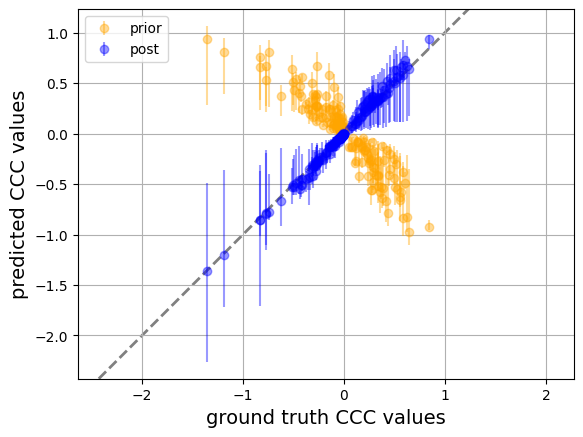

In [28]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'], yerr=CCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], yerr=CCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_noReg.svg', format="svg")

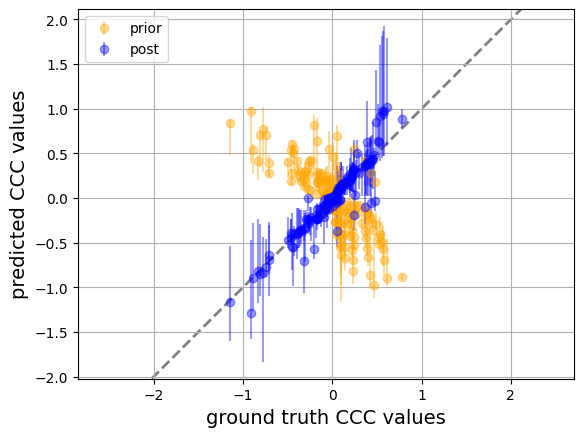

In [29]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'], yerr=CCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], yerr=CCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg1.svg', format="svg")

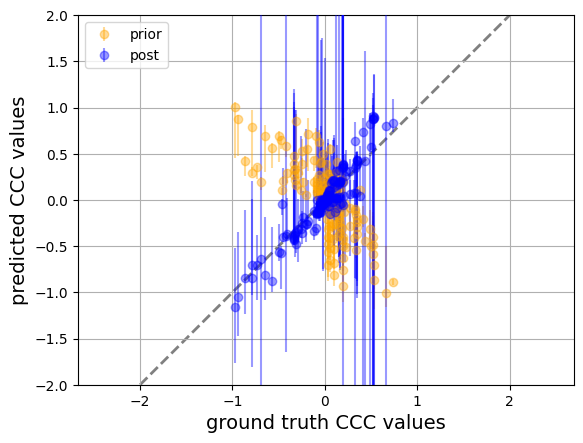

In [30]:
plt.axes().set_aspect('equal', 'datalim')

plt.ylim((-2,2))

plt.errorbar(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'], yerr=CCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], yerr=CCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg2.svg', format="svg")

### combined graph of CCC values

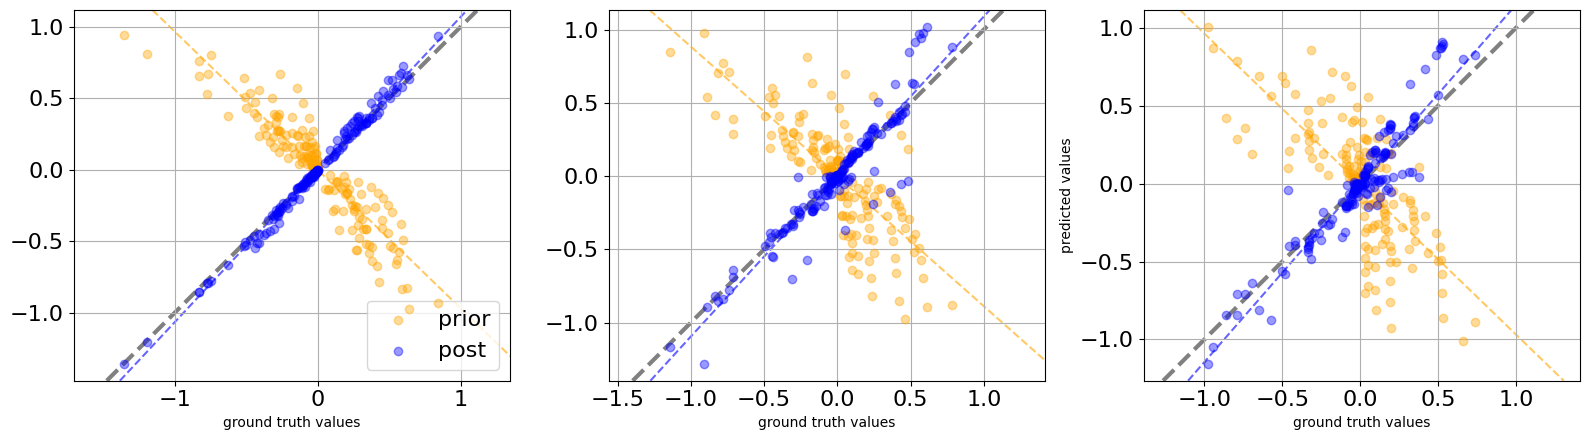

In [31]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))

for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_aspect('equal', 'datalim')
ax[0].scatter(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].grid()
ax[0].legend(loc="lower right", fontsize=16)
ax[0].set_xlabel('ground truth values', fontsize=18)

ax[1].set_aspect('equal', 'datalim')
ax[1].scatter(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].grid()
ax[1].set_xlabel('ground truth values', fontsize=18)

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[2].grid()

ax[2].set_xlabel('ground truth values', fontsize=18)
ax[0].set_ylabel('predicted values', fontsize=18)
  
f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedCCCs.svg', format="svg")

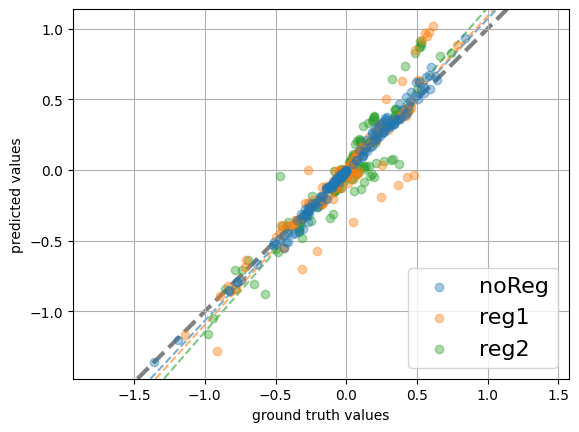

In [32]:
# Create two subplots and unpack the output array immediately

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], alpha=0.4, label='noReg', zorder=300)
plt.scatter(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], alpha=0.4,  label='reg1', zorder=200)
plt.scatter(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], alpha=0.4,  label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values')
plt.ylabel('predicted values')

f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedCCCs_byAllostery.svg', format="svg")

## Calculating FCC values and making graphs

In [14]:
gtFCC_noReg = pd.DataFrame(rr_noReg.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg1 = pd.DataFrame(rr_reg1.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg2 = pd.DataFrame(rr_reg2.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())

### priors

In [15]:
priorFCC01_noReg = util.estimate_FCCs(BMCA_obj01_noReg, Ex01_prior_noReg.reshape((16,-1)))
priorFCC02_noReg = util.estimate_FCCs(BMCA_obj02_noReg, Ex02_prior_noReg.reshape((16,-1)))
priorFCC03_noReg = util.estimate_FCCs(BMCA_obj03_noReg, Ex03_prior_noReg.reshape((16,-1)))
priorFCC04_noReg = util.estimate_FCCs(BMCA_obj04_noReg, Ex04_prior_noReg.reshape((16,-1)))
priorFCC05_noReg = util.estimate_FCCs(BMCA_obj05_noReg, Ex05_prior_noReg.reshape((16,-1)))
priorFCC15_noReg = util.estimate_FCCs(BMCA_obj15_noReg, Ex15_prior_noReg.reshape((16,-1)))
priorFCC3_noReg = util.estimate_FCCs(BMCA_obj3_noReg, Ex3_prior_noReg.reshape((16,-1)))
priorFCC5_noReg = util.estimate_FCCs(BMCA_obj5_noReg, Ex5_prior_noReg.reshape((16,-1)))
priorFCC7_noReg = util.estimate_FCCs(BMCA_obj7_noReg, Ex7_prior_noReg.reshape((16,-1)))
priorFCC100_noReg = util.estimate_FCCs(BMCA_obj100_noReg, Ex100_prior_noReg.reshape((16,-1)))

priorFCC01_reg1 = util.estimate_FCCs(BMCA_obj01_reg1, Ex01_prior_reg1.reshape((16,-1)))
priorFCC02_reg1 = util.estimate_FCCs(BMCA_obj02_reg1, Ex02_prior_reg1.reshape((16,-1)))
priorFCC03_reg1 = util.estimate_FCCs(BMCA_obj03_reg1, Ex03_prior_reg1.reshape((16,-1)))
priorFCC04_reg1 = util.estimate_FCCs(BMCA_obj04_reg1, Ex04_prior_reg1.reshape((16,-1)))
priorFCC05_reg1 = util.estimate_FCCs(BMCA_obj05_reg1, Ex05_prior_reg1.reshape((16,-1)))
priorFCC15_reg1 = util.estimate_FCCs(BMCA_obj15_reg1, Ex15_prior_reg1.reshape((16,-1)))
priorFCC3_reg1 = util.estimate_FCCs(BMCA_obj3_reg1, Ex3_prior_reg1.reshape((16,-1)))
priorFCC5_reg1 = util.estimate_FCCs(BMCA_obj5_reg1, Ex5_prior_reg1.reshape((16,-1)))
priorFCC7_reg1 = util.estimate_FCCs(BMCA_obj7_reg1, Ex7_prior_reg1.reshape((16,-1)))
priorFCC100_reg1 = util.estimate_FCCs(BMCA_obj100_reg1, Ex100_prior_reg1.reshape((16,-1)))

priorFCC01_reg2 = util.estimate_FCCs(BMCA_obj01_reg2, Ex01_prior_reg2.reshape((16,-1)))
priorFCC02_reg2 = util.estimate_FCCs(BMCA_obj02_reg2, Ex02_prior_reg2.reshape((16,-1)))
priorFCC03_reg2 = util.estimate_FCCs(BMCA_obj03_reg2, Ex03_prior_reg2.reshape((16,-1)))
priorFCC04_reg2 = util.estimate_FCCs(BMCA_obj04_reg2, Ex04_prior_reg2.reshape((16,-1)))
priorFCC05_reg2 = util.estimate_FCCs(BMCA_obj05_reg2, Ex05_prior_reg2.reshape((16,-1)))
priorFCC15_reg2 = util.estimate_FCCs(BMCA_obj15_reg2, Ex15_prior_reg2.reshape((16,-1)))
priorFCC3_reg2 = util.estimate_FCCs(BMCA_obj3_reg2, Ex3_prior_reg2.reshape((16,-1)))
priorFCC5_reg2 = util.estimate_FCCs(BMCA_obj5_reg2, Ex5_prior_reg2.reshape((16,-1)))
priorFCC7_reg2 = util.estimate_FCCs(BMCA_obj7_reg2, Ex7_prior_reg2.reshape((16,-1)))
priorFCC100_reg2 = util.estimate_FCCs(BMCA_obj100_reg2, Ex100_prior_reg2.reshape((16,-1)))


In [16]:
priorFCCs_noReg = [priorFCC01_noReg, priorFCC02_noReg, priorFCC03_noReg, priorFCC04_noReg, priorFCC05_noReg, priorFCC15_noReg, priorFCC3_noReg, priorFCC5_noReg, priorFCC7_noReg, priorFCC100_noReg]
priorFCCs_reg1 = [priorFCC01_reg1, priorFCC02_reg1, priorFCC03_reg1, priorFCC04_reg1, priorFCC05_reg1, priorFCC15_reg1, priorFCC3_reg1, priorFCC5_reg1, priorFCC7_reg1, priorFCC100_reg1]
priorFCCs_reg2 = [priorFCC01_reg2, priorFCC02_reg2, priorFCC03_reg2, priorFCC04_reg2, priorFCC05_reg2, priorFCC15_reg2, priorFCC3_reg2, priorFCC5_reg2, priorFCC7_reg2, priorFCC100_reg2]

In [17]:
priorFCC_noReg_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for priorFCC in priorFCCs_noReg]
priorFCC_noReg_meds = pd.concat([i.melt()['value'] for i in priorFCC_noReg_meds], axis=1).values
priorFCC_noReg_meds = pd.DataFrame(priorFCC_noReg_meds, columns=pt_labels)
priorFCC_noReg_meds['median'] = priorFCC_noReg_meds.median(axis=1)
priorFCC_noReg_meds['min'] = priorFCC_noReg_meds.min(axis=1)
priorFCC_noReg_meds['max'] = priorFCC_noReg_meds.max(axis=1)
# priorFCC_noReg_meds

In [18]:
priorFCC_reg1_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for priorFCC in priorFCCs_reg1]
priorFCC_reg1_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg1_meds], axis=1).values
priorFCC_reg1_meds = pd.DataFrame(priorFCC_reg1_meds, columns=pt_labels)
priorFCC_reg1_meds['median'] = priorFCC_reg1_meds.median(axis=1)
priorFCC_reg1_meds['min'] = priorFCC_reg1_meds.min(axis=1)
priorFCC_reg1_meds['max'] = priorFCC_reg1_meds.max(axis=1)
# priorFCC_reg1_meds

In [19]:
priorFCC_reg2_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for priorFCC in priorFCCs_reg2]
priorFCC_reg2_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg2_meds], axis=1).values
priorFCC_reg2_meds = pd.DataFrame(priorFCC_reg2_meds, columns=pt_labels)
priorFCC_reg2_meds['median'] = priorFCC_reg2_meds.median(axis=1)
priorFCC_reg2_meds['min'] = priorFCC_reg2_meds.min(axis=1)
priorFCC_reg2_meds['max'] = priorFCC_reg2_meds.max(axis=1)
# priorFCC_reg2_meds

In [20]:
FCC_lower_y_noReg_prior = np.array(priorFCC_noReg_meds['median']) - np.array(priorFCC_noReg_meds['min'])
FCC_upper_y_noReg_prior = np.array(priorFCC_noReg_meds['max']) - np.array(priorFCC_noReg_meds['median'])
FCC_errors_noReg_prior = [FCC_lower_y_noReg_prior, FCC_upper_y_noReg_prior]

FCC_lower_y_reg1_prior = np.array(priorFCC_reg1_meds['median']) - np.array(priorFCC_reg1_meds['min'])
FCC_upper_y_reg1_prior = np.array(priorFCC_reg1_meds['max']) - np.array(priorFCC_reg1_meds['median'])
FCC_errors_reg1_prior = [FCC_lower_y_reg1_prior, FCC_upper_y_reg1_prior]

FCC_lower_y_reg2_prior = np.array(priorFCC_reg2_meds['median']) - np.array(priorFCC_reg2_meds['min'])
FCC_upper_y_reg2_prior = np.array(priorFCC_reg2_meds['max']) - np.array(priorFCC_reg2_meds['median'])
FCC_errors_reg2_prior = [FCC_lower_y_reg2_prior, FCC_upper_y_reg2_prior]

### posteriors

In [22]:
# all data
postFCC01_noReg = util.estimate_FCCs(BMCA_obj01_noReg, Ex01_noReg.reshape((16, -1)))
postFCC02_noReg = util.estimate_FCCs(BMCA_obj02_noReg, Ex02_noReg.reshape((16, -1)))
postFCC03_noReg = util.estimate_FCCs(BMCA_obj03_noReg, Ex03_noReg.reshape((16, -1)))
postFCC04_noReg = util.estimate_FCCs(BMCA_obj04_noReg, Ex04_noReg.reshape((16, -1)))
postFCC05_noReg = util.estimate_FCCs(BMCA_obj05_noReg, Ex05_noReg.reshape((16, -1)))
postFCC15_noReg = util.estimate_FCCs(BMCA_obj15_noReg, Ex15_noReg.reshape((16, -1)))
postFCC3_noReg = util.estimate_FCCs(BMCA_obj3_noReg, Ex3_noReg.reshape((16, -1)))
postFCC5_noReg = util.estimate_FCCs(BMCA_obj5_noReg, Ex5_noReg.reshape((16, -1)))
postFCC7_noReg = util.estimate_FCCs(BMCA_obj7_noReg, Ex7_noReg.reshape((16, -1)))
postFCC100_noReg = util.estimate_FCCs(BMCA_obj100_noReg, Ex100_noReg.reshape((16, -1)))

postFCC01_reg1 = util.estimate_FCCs(BMCA_obj01_reg1, Ex01_reg1.reshape((16, -1)))
postFCC02_reg1 = util.estimate_FCCs(BMCA_obj02_reg1, Ex02_reg1.reshape((16, -1)))
postFCC03_reg1 = util.estimate_FCCs(BMCA_obj03_reg1, Ex03_reg1.reshape((16, -1)))
postFCC04_reg1 = util.estimate_FCCs(BMCA_obj04_reg1, Ex04_reg1.reshape((16, -1)))
postFCC05_reg1 = util.estimate_FCCs(BMCA_obj05_reg1, Ex05_reg1.reshape((16, -1)))
postFCC15_reg1 = util.estimate_FCCs(BMCA_obj15_reg1, Ex15_reg1.reshape((16, -1)))
postFCC3_reg1 = util.estimate_FCCs(BMCA_obj3_reg1, Ex3_reg1.reshape((16, -1)))
postFCC5_reg1 = util.estimate_FCCs(BMCA_obj5_reg1, Ex5_reg1.reshape((16, -1)))
postFCC7_reg1 = util.estimate_FCCs(BMCA_obj7_reg1, Ex7_reg1.reshape((16, -1)))
postFCC100_reg1 = util.estimate_FCCs(BMCA_obj100_reg1, Ex100_reg1.reshape((16, -1)))

postFCC01_reg2 = util.estimate_FCCs(BMCA_obj01_reg2, Ex01_reg2.reshape((16, -1)))
postFCC02_reg2 = util.estimate_FCCs(BMCA_obj02_reg2, Ex02_reg2.reshape((16, -1)))
postFCC03_reg2 = util.estimate_FCCs(BMCA_obj03_reg2, Ex03_reg2.reshape((16, -1)))
postFCC04_reg2 = util.estimate_FCCs(BMCA_obj04_reg2, Ex04_reg2.reshape((16, -1)))
postFCC05_reg2 = util.estimate_FCCs(BMCA_obj05_reg2, Ex05_reg2.reshape((16, -1)))
postFCC15_reg2 = util.estimate_FCCs(BMCA_obj15_reg2, Ex15_reg2.reshape((16, -1)))
postFCC3_reg2 = util.estimate_FCCs(BMCA_obj3_reg2, Ex3_reg2.reshape((16, -1)))
postFCC5_reg2 = util.estimate_FCCs(BMCA_obj5_reg2, Ex5_reg2.reshape((16, -1)))
postFCC7_reg2 = util.estimate_FCCs(BMCA_obj7_reg2, Ex7_reg2.reshape((16, -1)))
postFCC100_reg2 = util.estimate_FCCs(BMCA_obj100_reg2, Ex100_reg2.reshape((16, -1)))

In [23]:
postFCCs_noReg = [postFCC01_noReg, postFCC02_noReg, postFCC03_noReg, postFCC04_noReg, postFCC05_noReg, postFCC15_noReg, postFCC3_noReg, postFCC5_noReg, postFCC7_noReg, postFCC100_noReg]
postFCCs_reg1 = [postFCC01_reg1, postFCC02_reg1, postFCC03_reg1, postFCC04_reg1, postFCC05_reg1, postFCC15_reg1, postFCC3_reg1, postFCC5_reg1, postFCC7_reg1, postFCC100_reg1]
postFCCs_reg2 = [postFCC01_reg2, postFCC02_reg2, postFCC03_reg2, postFCC04_reg2, postFCC05_reg2, postFCC15_reg2, postFCC3_reg2, postFCC5_reg2, postFCC7_reg2, postFCC100_reg2]

In [24]:
# omit enzymes
def estimate_CCs(BMCA_obj, Ex, med_et_advi):
    BMCA_obj.vn[BMCA_obj.vn == 0] = 1e-6
    
    a = np.diag(med_et_advi / BMCA_obj.vn.values)
    a = np.diag(a)
    a = a[np.newaxis,:].repeat(3000, axis=0)

    Ex_ss = a @ Ex
    As = BMCA_obj.N @ np.diag(BMCA_obj.v_star) @ Ex_ss
    bs = BMCA_obj.N @ np.diag(BMCA_obj.v_star)
    bs = bs[np.newaxis, :].repeat(3000, axis=0)
    
    As = at.as_tensor_variable(As)
    bs = at.as_tensor_variable(bs)

    def solve_aesara(A, b):
        rsolve_op = LeastSquaresSolve()
        return rsolve_op(A, b).squeeze()

    CCC, _ = aesara.scan(lambda A, b: solve_aesara(A, b),
                        sequences=[As, bs], strict=True)

    identity = np.eye(len(BMCA_obj.N.T))
    identity = identity[np.newaxis,:].repeat(3000, axis=0)
    
    FCC = (Ex_ss @ CCC.eval()) + identity
    
    return FCC


In [25]:
postFCC_noReg_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for postFCC in postFCCs_noReg]
postFCC_noReg_meds = pd.concat([i.melt()['value'] for i in postFCC_noReg_meds], axis=1).values
postFCC_noReg_meds = pd.DataFrame(postFCC_noReg_meds, columns=pt_labels)
postFCC_noReg_meds['median'] = postFCC_noReg_meds.median(axis=1)
postFCC_noReg_meds['min'] = postFCC_noReg_meds.min(axis=1)
postFCC_noReg_meds['max'] = postFCC_noReg_meds.max(axis=1)
# postFCC_noReg_meds

In [26]:
postFCC_reg1_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for postFCC in postFCCs_reg1]
postFCC_reg1_meds = pd.concat([i.melt()['value'] for i in postFCC_reg1_meds], axis=1).values
postFCC_reg1_meds = pd.DataFrame(postFCC_reg1_meds, columns=pt_labels)
postFCC_reg1_meds['median'] = postFCC_reg1_meds.median(axis=1)
postFCC_reg1_meds['min'] = postFCC_reg1_meds.min(axis=1)
postFCC_reg1_meds['max'] = postFCC_reg1_meds.max(axis=1)
# postFCC_reg1_meds

In [27]:
postFCC_reg2_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for postFCC in postFCCs_reg2]
postFCC_reg2_meds = pd.concat([i.melt()['value'] for i in postFCC_reg2_meds], axis=1).values
postFCC_reg2_meds = pd.DataFrame(postFCC_reg2_meds, columns=pt_labels)
postFCC_reg2_meds['median'] = postFCC_reg2_meds.median(axis=1)
postFCC_reg2_meds['min'] = postFCC_reg2_meds.min(axis=1)
postFCC_reg2_meds['max'] = postFCC_reg2_meds.max(axis=1)
# postFCC_reg2_meds

In [28]:
FCC_lower_y_noReg_post = np.array(postFCC_noReg_meds['median']) - np.array(postFCC_noReg_meds['min'])
FCC_upper_y_noReg_post = np.array(postFCC_noReg_meds['max']) - np.array(postFCC_noReg_meds['median'])
FCC_errors_noReg_post = [FCC_lower_y_noReg_post, FCC_upper_y_noReg_post]

FCC_lower_y_reg1_post = np.array(postFCC_reg1_meds['median']) - np.array(postFCC_reg1_meds['min'])
FCC_upper_y_reg1_post = np.array(postFCC_reg1_meds['max']) - np.array(postFCC_reg1_meds['median'])
FCC_errors_reg1_post = [FCC_lower_y_reg1_post, FCC_upper_y_reg1_post]

FCC_lower_y_reg2_post = np.array(postFCC_reg2_meds['median']) - np.array(postFCC_reg2_meds['min'])
FCC_upper_y_reg2_post = np.array(postFCC_reg2_meds['max']) - np.array(postFCC_reg2_meds['median'])
FCC_errors_reg2_post = [FCC_lower_y_reg2_post, FCC_upper_y_reg2_post]

### graphs

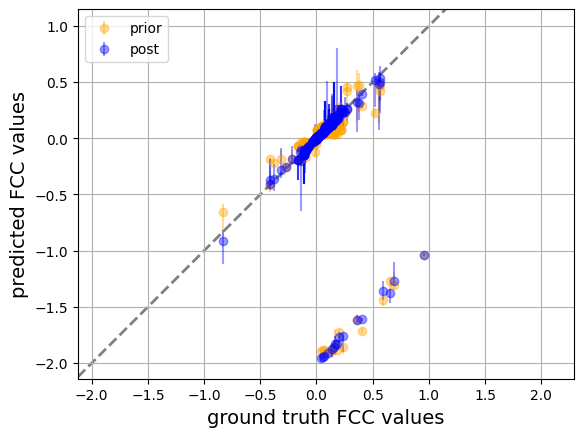

In [27]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg.svg', format="svg")

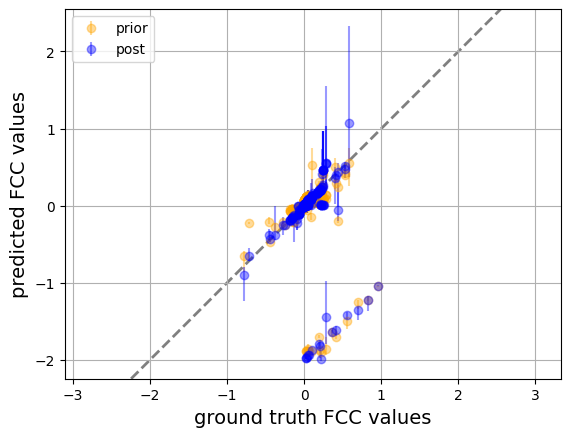

In [28]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], yerr=FCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], yerr=FCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1.svg', format="svg")

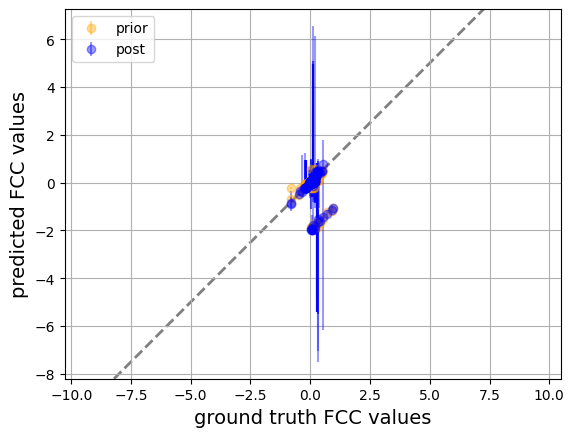

In [29]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], yerr=FCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], yerr=FCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2.svg', format="svg")

### adding corrections for where the enzyme perturbed is directly involved in the reaction

In [29]:
rxn = np.repeat(rr_noReg.getReactionIds(),len(rr_noReg.getReactionIds()))
enz_pt = rr_noReg.getReactionIds() * len(rr_noReg.getReactionIds())
FCC_idx = pd.DataFrame([rxn, enz_pt]).T

In [30]:
for i in np.where(abs(gtFCC_noReg.melt()['value']- postFCC_noReg_meds['median'])>1):
    print(FCC_idx.iloc[i])
pt_enz_is_rxn = list(np.where(abs(gtFCC_noReg.melt()['value']- postFCC_noReg_meds['median'])>1)[0])

        0     1
0    vKIL  vKIL
17   vLIM  vLIM
34   vMIK  vMIK
51   vNOV  vNOV
68   vOSC  vOSC
85   vPAP  vPAP
102  vQUE  vQUE
119  vROM  vROM
136  vSIE  vSIE
153  vTAN  vTAN
170  vUNI  vUNI
187  vVIC  vVIC
204  vWHI  vWHI
221  vALP  vALP
238  vYAN  vYAN
255  vZUL  vZUL


### graphing the corrected fcc dfs

In [ ]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

In [ ]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg_wCorrection.svg', format="svg")

In [ ]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], yerr=FCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], yerr=FCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1_wCorrection.svg', format="svg")

In [ ]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], yerr=FCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], yerr=FCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2_wCorrection.svg', format="svg")

### Combined graph of FCC values

In [ ]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))


for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

"""
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
"""

ax[0].set_aspect('equal', 'datalim')
ax[0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].grid()

ax[1].set_aspect('equal', 'datalim')
ax[1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].grid()

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[2].grid()
    
f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-combinedFCCs.svg', format="svg")

In [31]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

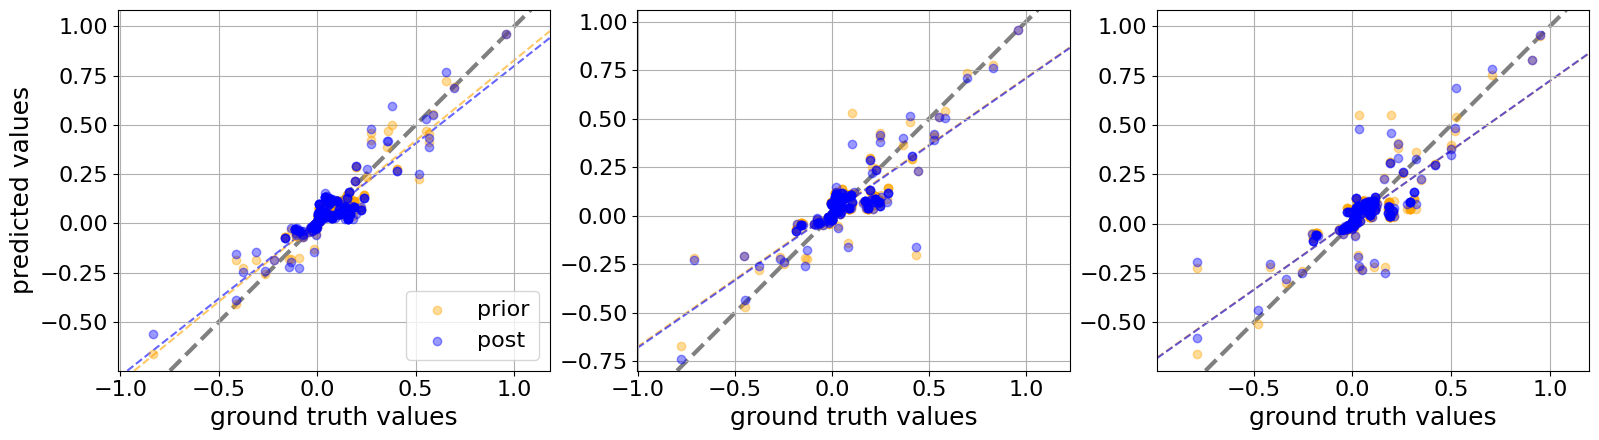

In [32]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))

for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_aspect('equal', 'datalim')
ax[0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].grid()
ax[0].legend(loc="lower right", fontsize=16)
ax[0].set_xlabel('ground truth values', fontsize=18)

ax[1].set_aspect('equal', 'datalim')
ax[1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].grid()
ax[1].set_xlabel('ground truth values', fontsize=18)

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[2].grid()

ax[2].set_xlabel('ground truth values', fontsize=18)
ax[0].set_ylabel('predicted values', fontsize=18)

f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs.svg', format="svg")

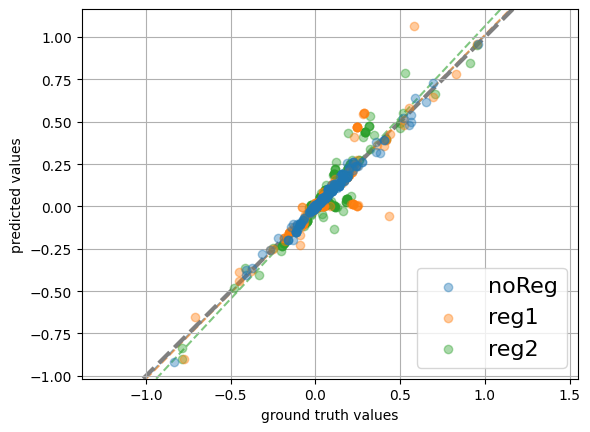

In [68]:
# Create two subplots and unpack the output array immediately

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='noReg', zorder=300)
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='reg1', zorder=200)
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values')
plt.ylabel('predicted values')

f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs_byAllostery.svg', format="svg")

## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


In [11]:
rank_counts_df = pd.read_csv('../data/results/TopologyA_top10.csv')

In [12]:
rank_counts_df.head()

,Perturbation,omittedData,regulation,count,type
0,0.1x,allData,noReg,7,prior
1,0.2x,allData,noReg,7,prior
2,0.3x,allData,noReg,7,prior
3,0.4x,allData,noReg,7,prior
4,0.5x,allData,noReg,7,prior


In [36]:
stagbar_counts = rank_counts_df.pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])
stagbar_counts

C:\Users\user\AppData\Local\Temp\ipykernel_28476\1542227218.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\1542227218.py:1: FutureWarning:

The operation <function std at 0x000001CA7EDEA1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



,omittedData,type,mean,std
,,,count,count
1,allData,prior,6.700000,0.466092
0,allData,post,8.233333,1.278019
7,omitFluxes,prior,6.666667,0.479463
6,omitFluxes,post,7.066667,0.784915
3,omitEnzymes,prior,6.666667,0.479463
2,omitEnzymes,post,7.433333,0.858360
9,omitIntMet,prior,6.666667,0.479463
8,omitIntMet,post,8.066667,1.172481
5,omitExMet,prior,6.700000,0.466092


C:\Users\user\AppData\Local\Temp\ipykernel_28476\2033004726.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



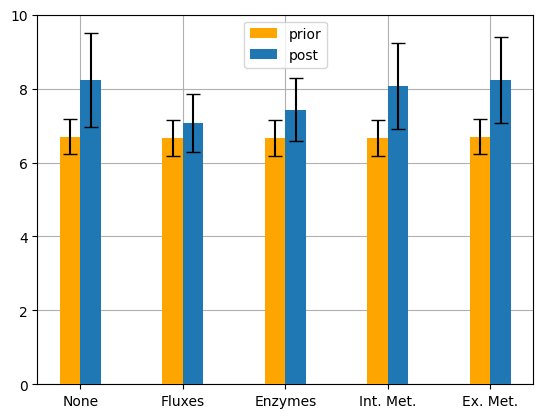

In [ ]:
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_28476\2883928629.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\2883928629.py:1: FutureWarning:

The operation <function std at 0x000001CA7EDEA1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\2883928629.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



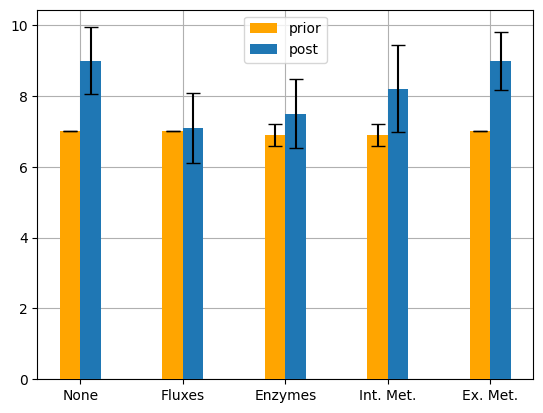

In [ ]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='noReg'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-noReg_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_28476\1649415053.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\1649415053.py:1: FutureWarning:

The operation <function std at 0x000001CA7EDEA1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\1649415053.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



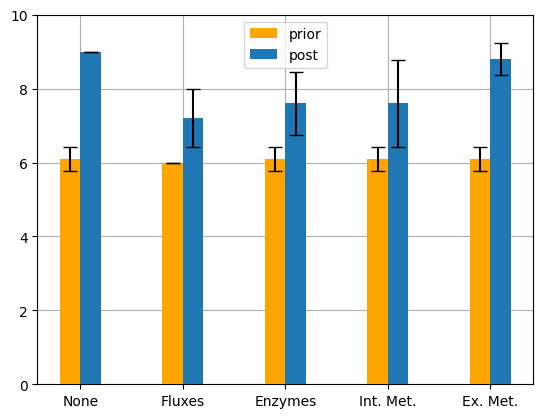

In [ ]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg1'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg1_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_28476\625236278.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\625236278.py:1: FutureWarning:

The operation <function std at 0x000001CA7EDEA1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_28476\625236278.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



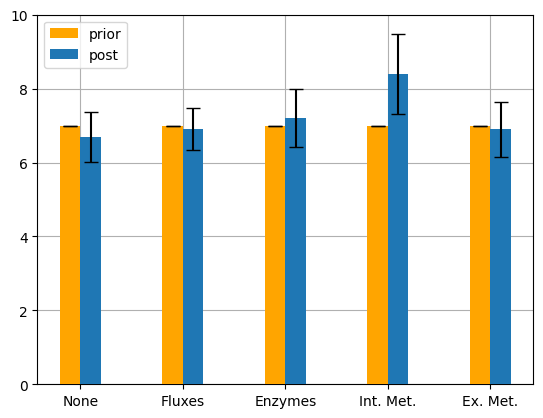

In [ ]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg2'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg2_rankCounts.svg', format='svg')

# Old analyses

## Visualizing Spearman data 

### Condensing all the spearman r data

In [ ]:
os.chdir('../data/results/spearman_coefficients/')

In [ ]:
spr_file_list = [i for i in os.listdir() if "topologyA" in i]

spr_dfs = []
for file in spr_file_list:
    a = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    spr_dfs.append(a)

all_spr_df_A = pd.concat(spr_dfs)
all_spr_df_A

In [ ]:
os.chdir('../../../notebooks/')

In [ ]:
all_spr_df_A.rename(columns={'Unnamed: 0':'perturbation'}, inplace=True)
all_spr_df_A['perturbation'] = [float(i.split('x')[0]) for i in all_spr_df_A['perturbation']]

In [ ]:
a = all_spr_df_A.pivot(index=['omit', 'reg'], columns='perturbation', values='r')
a

In [ ]:
fluxes_comp = all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg2') & (all_spr_df_A['omit'].isin(['none', 'omitFluxes']))]
enzymes_comp = all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg2') & (all_spr_df_A['omit'].isin(['none', 'omitEnzymes']))]
intMet_comp = all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg2') & (all_spr_df_A['omit'].isin(['none', 'omitIntMet']))]
exMet_comp = all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg2') & (all_spr_df_A['omit'].isin(['none', 'omitExMet']))]

###  All-in-one scatter plots

In [ ]:
util.plt_spr_scatter(all_spr_df_A.loc[(all_spr_df_A['reg'] =='noReg')], 'Spearman rank coefficients, noReg')

In [ ]:
util.plt_spr_scatter(all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg1')], 'Spearman rank coefficients, reg1')

In [ ]:
util.plt_spr_scatter(all_spr_df_A.loc[(all_spr_df_A['reg'] =='reg2')], 'Spearman rank coefficients, reg2')

## Comparing Spearman r coefficients pairwise to find significant differences
My way of doing that would be to plot the confidence intervals around the
coefficients and compare them. 

Another testing option would be looking at the absolute difference in the ranks 
between a prediction method and the truth. You would have a sample of absolute 
rank differences for each method, but they would not independent (so can't use 
Kruskal-Wallis test). The samples of differences would be dependent ("paired" 
across methods by the observation/value being ranked). A test that you could use
is Friedman's test which is based on ranks (kind of like an extension of the 
Wilcoxon signed rank test for more than 2 "paired"/dependent samples). Post-hoc 
testing could be done using the Wilcoxon signed rank test and using Holm's or 
Bonferroni method to adjust the p-value for multiple testing.

In [ ]:
all_spr_df_A = all_spr_df_A[all_spr_df_A['perturbation'] != 1.01]

In [ ]:
def plot_CI_comparisons(subplot, omitted_type, reg_level, CRISPRi=True, color='orange'):

    if CRISPRi: 
        df1 = all_spr_df_A[(all_spr_df_A['reg']==reg_level) & (all_spr_df_A['omit']=='allData')][0:5]
        df2 = all_spr_df_A[(all_spr_df_A['reg']==reg_level) & (all_spr_df_A['omit']==f'omit{omitted_type}')][0:5]

        x1 = np.linspace(90,50,5)
        x2 = np.linspace(90,50,5)

    else:
        df1 = all_spr_df_A[(all_spr_df_A['reg']==reg_level) & (all_spr_df_A['omit']=='allData')][5:10]
        df2 = all_spr_df_A[(all_spr_df_A['reg']==reg_level) & (all_spr_df_A['omit']==f'omit{omitted_type}')][5:10]

        x1 = df1['perturbation']
        x2 = df2['perturbation']

    ymin1 = (df1['r'] - df1['lower']).values
    ymax1 = (df1['upper'] - df1['r']).values

    ymin2 = (df2['r'] - df2['lower']).values
    ymax2 = (df2['upper'] - df2['r']).values

    subplot.scatter(x1, 
                abs(df1['r']), alpha=0.8, s=40, zorder=1000, label='all data', 
                color='red')
    subplot.errorbar(x1, df1['r'], yerr=np.stack((ymin1, ymax1)), 
                 linestyle='None', color='red', zorder=100)

    subplot.scatter(x2, 
                abs(df2['r']), alpha=0.8, s=100, zorder=50, 
                label=f'omit {omitted_type}', c=color)
    subplot.errorbar(x2, df2['r'], yerr=np.stack((ymin2, ymax2)), 
                 elinewidth=6, linestyle='None', c=color, zorder=10,
                 alpha=0.8)

    subplot.grid(True, which='both', axis='both', zorder=0)
    subplot.set_ylim([0,1])
        

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12,8), sharex=True)
plot_CI_comparisons(ax[0,0], "Fluxes", "noReg")
plot_CI_comparisons(ax[0,1], "Fluxes", "reg1", color='green')
plot_CI_comparisons(ax[0,2], "Fluxes", "reg2", color='blue')

plot_CI_comparisons(ax[1,0], "Enzymes", "noReg")
plot_CI_comparisons(ax[1,1], "Enzymes", "reg1", color='green')
plot_CI_comparisons(ax[1,2], "Enzymes", "reg2", color='blue')

plot_CI_comparisons(ax[2,0], "IntMet", "noReg")
plot_CI_comparisons(ax[2,1], "IntMet", "reg1", color='green')
plot_CI_comparisons(ax[2,2], "IntMet", "reg2", color='blue')

plot_CI_comparisons(ax[3,0], "ExMet", "noReg")
plot_CI_comparisons(ax[3,1], "ExMet", "reg1", color='green')
plot_CI_comparisons(ax[3,2], "ExMet", "reg2", color='blue')

fig.text(0.05, 0.9, 'omitted\ndata')
fig.text(0.22, 0.9, 'noReg')
fig.text(0.5, 0.9, 'reg1')
fig.text(0.77, 0.9, 'reg2')

fig.text(0.07, 0.77, 'fluxes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.55, 'enzymes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.35, 'internal mets', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.13, 'external mets', rotation=90, rotation_mode='anchor')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration")
plt.ylabel(r"spearman coefficient, $\rho$")

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels", size=20)


In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12,8), sharex=True)
plot_CI_comparisons(ax[0,0], "Fluxes", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[0,1], "Fluxes", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[0,2], "Fluxes", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[1,0], "Enzymes", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[1,1], "Enzymes", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[1,2], "Enzymes", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[2,0], "IntMet", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[2,1], "IntMet", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[2,2], "IntMet", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[3,0], "ExMet", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[3,1], "ExMet", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[3,2], "ExMet", "reg2", CRISPRi=False, color='blue')


fig.text(0.05, 0.9, 'omitted\ndata')
fig.text(0.22, 0.9, 'noReg')
fig.text(0.5, 0.9, 'reg1')
fig.text(0.77, 0.9, 'reg2')

fig.text(0.07, 0.77, 'fluxes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.55, 'enzymes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.35, 'internal mets', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.13, 'external mets', rotation=90, rotation_mode='anchor')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration")
plt.ylabel(r"spearman coefficient, $\rho$")

fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels", size=20)


### Comprehensive bar plots

In [ ]:
noReg_df = all_spr_df_A[all_spr_df_A['reg'] == 'noReg']
noReg_df['r'] = noReg_df['r'].round(3)
noReg_df['ymin'] = noReg_df['r'] - noReg_df['lower']
noReg_df['ymax'] = noReg_df['upper'] - noReg_df['r']

A_reg1_df = all_spr_df_A[all_spr_df_A['reg'] == 'reg1']
A_reg1_df['r'] = A_reg1_df['r'].round(3)
A_reg1_df['ymin'] = A_reg1_df['r'] - A_reg1_df['lower']
A_reg1_df['ymax'] = A_reg1_df['upper'] - A_reg1_df['r']

A_reg2_df = all_spr_df_A[all_spr_df_A['reg'] == 'reg2']
A_reg2_df['r'] = A_reg2_df['r'].round(3)
A_reg2_df['ymin'] = A_reg2_df['r'] - A_reg2_df['lower']
A_reg2_df['ymax'] = A_reg2_df['upper'] - A_reg2_df['r']

In [ ]:
species = list(all_spr_df_A['perturbation'].unique()[0:5])[::-1]
penguin_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((noReg_df[noReg_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((noReg_df[noReg_df['omit'] == attribute]['ymax']).values[0:5])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, A-noReg", size=20)


In [ ]:
species = all_spr_df_A['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['r']).values[5:10])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((noReg_df[noReg_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((noReg_df[noReg_df['omit'] == attribute]['ymax']).values[5:10])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, A-noReg", size=20)


In [ ]:
species = list(A_reg1_df['perturbation'].unique()[0:5])[::-1]
penguin_means = {
    'allData': tuple((A_reg1_df[A_reg1_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((A_reg1_df[A_reg1_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((A_reg1_df[A_reg1_df['omit'] == attribute]['ymax']).values[0:5])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, A-reg1", size=20)

In [ ]:
species = all_spr_df_A['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((A_reg1_df[A_reg1_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((A_reg1_df[A_reg1_df['omit'] == 'omitExMet']['r']).values[5:10])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((A_reg1_df[A_reg1_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((A_reg1_df[A_reg1_df['omit'] == attribute]['ymax']).values[5:10])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, A-reg1", size=20)


In [ ]:
species = list(all_spr_df_A['perturbation'].unique()[0:5])[::-1]
penguin_means = {
    'allData': tuple((A_reg2_df[A_reg2_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

ymin = (A_reg2_df['r'] - A_reg2_df['lower']).values[0:5]
ymax = (A_reg2_df['upper'] - A_reg2_df['r']).values[0:5]

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((A_reg2_df[A_reg2_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((A_reg2_df[A_reg2_df['omit'] == attribute]['ymax']).values[0:5])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, A-reg2", size=20)

In [ ]:
species = all_spr_df_A['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((A_reg2_df[A_reg2_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((A_reg2_df[A_reg2_df['omit'] == 'omitExMet']['r']).values[5:10])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((A_reg2_df[A_reg2_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((A_reg2_df[A_reg2_df['omit'] == attribute]['ymax']).values[5:10])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((-0.7,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, A-reg2", size=20)


## Visualizing MAE across the different types of data

In [ ]:
os.chdir('../data/results/MAE/')
MAE_file_list = [i for i in os.listdir() if "topologyA" in i]

MAE_dfs = []
for file in MAE_file_list:
    a = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    MAE_dfs.append(a)

all_MAE_df_A = pd.concat(MAE_dfs)
all_MAE_df_A

os.chdir('../../../notebooks/')


In [ ]:
all_MAE_df_A.columns = ['perturbation', 'values', 'reg', 'omit']
all_MAE_df_A['values'] = all_MAE_df_A['values']/176
all_MAE_df_A

In [ ]:
a = all_MAE_df_A.pivot(index=['omit', 'reg'], columns='perturbation', values='values')

all_MAE_df_A = all_MAE_df_A[all_MAE_df_A['perturbation'] != 1.01]
all_MAE_df_A = all_MAE_df_A[all_MAE_df_A['perturbation'] != 'knockout']


In [ ]:
noReg_df = all_MAE_df_A[all_MAE_df_A['reg'] == 'noReg']
noReg_df['r'] = noReg_df['values'].round(3)
noReg_df.head()

species = list(all_MAE_df_A['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,.16))
ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, A-noReg", size=20)


In [ ]:
species = list(all_MAE_df_A['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, A-noReg", size=20)


In [ ]:
reg1_df = all_MAE_df_A[all_MAE_df_A['reg'] == 'reg1']
reg1_df['r'] = reg1_df['values'].round(3)
reg1_df.head()

species = list(all_MAE_df_A['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((reg1_df[reg1_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((reg1_df[reg1_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((reg1_df[reg1_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((reg1_df[reg1_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((reg1_df[reg1_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,.16))
ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, A-reg1", size=20)


In [ ]:
species = list(all_MAE_df_A['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((reg1_df[reg1_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((reg1_df[reg1_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((reg1_df[reg1_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((reg1_df[reg1_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((reg1_df[reg1_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, A-reg1", size=20)


In [ ]:
reg2_df = all_MAE_df_A[all_MAE_df_A['reg'] == 'reg2']
reg2_df['r'] = reg2_df['values'].round(3)
reg2_df.head()

species = list(all_MAE_df_A['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((reg2_df[reg2_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((reg2_df[reg2_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((reg2_df[reg2_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((reg2_df[reg2_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((reg2_df[reg2_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,.16))
ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, A-reg2", size=20)


In [ ]:
species = list(all_MAE_df_A['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((reg2_df[reg2_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((reg2_df[reg2_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((reg2_df[reg2_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((reg2_df[reg2_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((reg2_df[reg2_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, A-reg2", size=20)


## Make tables of ranking correctness

In [ ]:
os.chdir('../data/results/rankings/')

In [ ]:
rank_file_list = [i for i in os.listdir() if "topologyA" in i]

rank_dfs = []
for file in rank_file_list:
    a = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    rank_dfs.append(a)

all_rank_df_A = pd.concat(rank_dfs)# .drop('1.01x', axis=1)
all_rank_df_A

In [ ]:
os.chdir('../../../notebooks/')

#### Counts of top three ranked FCCs

In [ ]:
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x', '0.5x', '1.5x', '3x', '5x', '7x', '10x']

In [ ]:
topThree_df = all_rank_df_A[all_rank_df_A['vYAN'].isin([1, 2, 3])]

gt_ranks = all_rank_df_A['gt'].head(15)

rank_noReg = topThree_df[topThree_df['reg']=='noReg']#.drop('gt', axis=1)
rank_reg1 = topThree_df[topThree_df['reg']=='reg1']#.drop('gt', axis=1)
rank_reg2 = topThree_df[topThree_df['reg']=='reg2']#.drop('gt', axis=1)

In [ ]:
gt_t3 = rank_noReg.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_noReg.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t3_results

In [ ]:
gt_t3 = rank_reg1.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_reg1.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t3_results

In [ ]:
gt_t3 = rank_reg2.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_reg2.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t3_results

#### Counts of top five ranked FCCs

In [ ]:
topFive_df = all_rank_df_A[all_rank_df_A['vYAN'].isin([1, 2, 3, 4, 5])]

gt_ranks_5 = all_rank_df_A['gt'].head(15)

rank_noReg_5 = topFive_df[topFive_df['reg']=='noReg']#.drop('gt', axis=1)
rank_reg1_5 = topFive_df[topFive_df['reg']=='reg1']#.drop('gt', axis=1)
rank_reg2_5 = topFive_df[topFive_df['reg']=='reg2']#.drop('gt', axis=1)

In [ ]:
gt_t5 = rank_noReg_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_noReg_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t5_results

In [ ]:
gt_t5 = rank_reg1_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_reg1_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t5_results

In [ ]:
gt_t5 = rank_reg2_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_reg2_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_A['omit'].unique(), columns=pt_labels)
t5_results